In [2]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [3]:
Data=pd.read_csv("Twitter Hate Speech - Twitter Hate Speech.csv")

In [4]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


## 1. Data Cleaning with Regex and Python

For cleaning the tweets, We can use regular expressions (regex) to identify and remove or replace parts of the tweets that aren't useful for your analysis. Common steps include:

- **Removing user mentions** (e.g., `@user`)
- **Removing URLs**
- **Removing special characters and emoticons**
- **Optionally, converting all text to lowercase** to ensure uniformity


In [5]:
# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@user', '', tweet)  # Remove @user
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'\\x[\w]{2,}', '', tweet)  # Remove encoded characters (e.g., emoji)
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

# Apply cleaning function to tweets
Data['cleaned_tweet'] = Data['tweet'].apply(clean_tweet)

# Show cleaned data
print(Data[['id', 'label', 'cleaned_tweet']].head())

# Display the counts


   id  label                                      cleaned_tweet
0   1      0   when a father is dysfunctional and is so self...
1   2      0    thanks for lyft credit i cant use cause they...
2   3      0                                bihday your majesty
3   4      0  model   i love u take with u all the time in u...
4   5      0               factsguide society now    motivation


In [6]:
# Display the first few rows to understand the dataset's structure
print(Data.head())

# Dataset shape to see the number of rows (tweets) and columns
print(Data.shape)

# Basic information about dataset
Data.info()

# Descriptive statistics for numerical columns
print(Data.describe())

# Count the number of unique values in the 'label' column to understand the classification distribution
print(Data['label'].value_counts())


# Check for missing values in the cleaned dataset
print(Data.isnull().sum())

# Check for any duplicates
print(Data.duplicated().sum())


   id  label                                              tweet  \
0   1      0  @user when a father is dysfunctional and is so...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  
0   when a father is dysfunctional and is so self...  
1    thanks for lyft credit i cant use cause they...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4               factsguide society now    motivation  
(31962, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31962 non-null  int64 
 1   label         

## Exploratory Data Analysis (EDA) Summary

### Dataset Overview

We embarked on an initial exploratory data analysis to understand our dataset's structure, types of data contained, and any immediate observations that could inform our subsequent analysis and modeling efforts. Here are our findings:

- **Dataset Composition**: Our dataset includes tweets categorized into hate speech (`1`) and non-hate speech (`0`). Each tweet is uniquely identified by an `id` and is presented in both original (`tweet`) and pre-processed (`cleaned_tweet`) forms.

- **Initial Peek**:
    - The dataset comprises four main columns: `id`, `label`, `tweet`, and `cleaned_tweet`.
    - `id`: Unique identifier for each tweet.
    - `label`: Indicates hate speech (`1`) or not (`0`).
    - `tweet`: Original tweet text.
    - `cleaned_tweet`: Pre-processed tweet text.

    First few rows:
    ```plaintext
       id  label                                              tweet                                      cleaned_tweet
    0   1      0  @user when a father is dysfunctional and is so...   when a father is dysfunctional and is so self...
    1   2      0  @user @user thanks for #lyft credit i can't us...    thanks for lyft credit i cant use cause they...
    2   3      0                                bihday your majesty                                bihday your majesty
    3   4      0  #model   i love u take with u all the time in ...  model   i love u take with u all the time in u...
    4   5      0             factsguide: society now    #motivation               factsguide society now    motivation
    ```

- **Dataset Shape**:
    - Contains 31,962 rows and 4 columns.
    ```plaintext
    (31962, 4)
    ```

- **Data Types and Completeness**:
    - No missing values detected across all columns.
    - Columns include two integers (`id`, `label`) and two strings (`tweet`, `cleaned_tweet`).

    Basic info:
    ```plaintext
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 31962 entries, 0 to 31961
    Data columns (total 4 columns):
     #   Column         Non-Null Count  Dtype 
    ---  ------         --------------  ----- 
     0   id             31962 non-null  int64 
     1   label          31962 non-null  int64 
     2   tweet          31962 non-null  object
     3   cleaned_tweet  31962 non-null  object
    dtypes: int64(2), object(2)
    memory usage: 998.9+ KB
    ```

- **Statistical Summary**:
    - Offers a numerical overview of the dataset, particularly useful for the `label` distribution.

    Summary stats:
    ```plaintext
                     id         label
    count  31962.000000  31962.000000
    mean   15981.500000      0.070146
    std     9226.778988      0.255397
    min        1.000000      0.000000
    25%     7991.250000      0.000000
    50%    15981.500000      0.000000
    75%    23971.750000      0.000000
    max    31962.000000      1.000000
    ```

- **Label Distribution**:
    - Essential for understanding the balance of classes within our dataset. The dataset is significantly skewed towards non-hate speech tweets.

    Label counts:
    ```plaintext
    label
    0    29720
    1     2242
    Name: count, dtype: int64
    ```

This preliminary analysis has set the stage for deeper dives into data preprocessing, feature engineering, and ultimately, the development and evaluation of models for hate speech detection.


## Data Integrity Check

After initial exploration, we conducted a thorough check for data integrity issues, specifically focusing on missing values and duplicate entries.

- **Missing Values & Duplicate Entries**: We checked each column for missing & duplicate values and found none across the dataset.

```plaintext
id               0
label            0
tweet            0
cleaned_tweet    0
dtype: int64



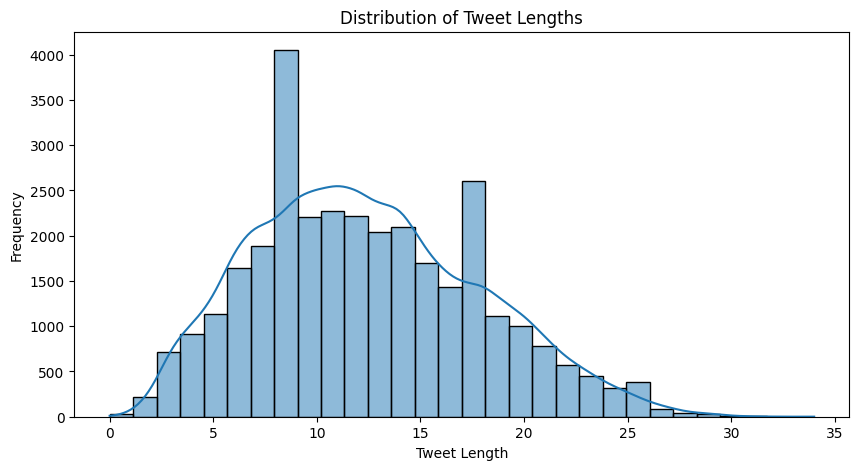

In [7]:
# Calculate the length of each cleaned tweet
Data['tweet_length'] = Data['cleaned_tweet'].apply(lambda x: len(x.split()))

# Plot the distribution of tweet lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(Data['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


## Tweet Length Distribution Analysis

We calculated the length of each cleaned tweet to explore the distribution of tweet lengths within our dataset. The length of a tweet is defined as the number of words it contains after preprocessing.

The histogram indicates the majority of tweets are between 10 to 20 words long. A kernel density estimate (KDE) is also plotted to show the distribution trend. This information is crucial as it might impact the choice of tokenization and padding strategies when preparing the data for input into our NLP model.


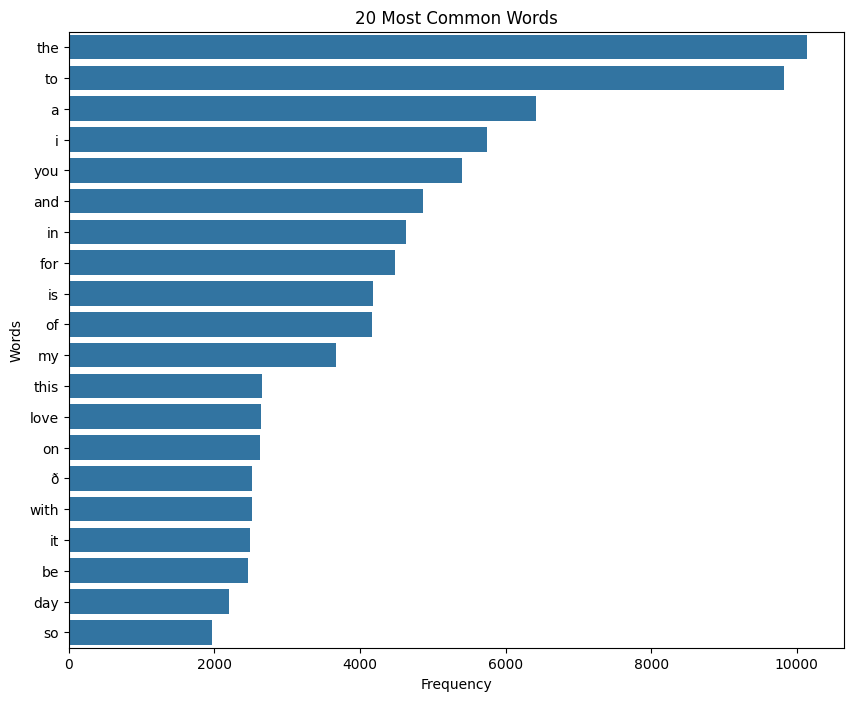

In [10]:
# Concatenate all cleaned tweets into a single string
all_words = ' '.join(Data['cleaned_tweet']).split()

# Count and display the most common words
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Unpack the words and counts from the most common words
words, counts = zip(*most_common_words)

# Create the bar plot for the most common words
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(words))
plt.title('20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


## Word Frequency Analysis

We consolidated all the cleaned tweets to form a collective text and then identified the most common words. This analysis helps in understanding the general vocabulary and discourse present in the tweets. 

The following bar chart visualizes the 20 most common words found in our dataset, providing insights into the recurrent themes and terms used in the tweets.

From the chart, we can observe that some of the most frequent words are common English words, which are typically known as 'stop words' in NLP. These words often require removal before further processing since they may not contribute meaningful information for analysis or modeling tasks.
